<a href="https://colab.research.google.com/github/Praveena-Krishnan/Internship-Projects/blob/main/Hill_and_Valley_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hill and valley prediction with Logistic Regression

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("Hill Valley Dataset.csv" )

In [5]:
df.head

<bound method NDFrame.head of             V1        V2        V3        V4        V5        V6        V7  \
0        39.02     36.49     38.20     38.85     39.38     39.74     37.02   
1         1.83      1.71      1.77      1.77      1.68      1.78      1.80   
2     68177.69  66138.42  72981.88  74304.33  67549.66  69367.34  69169.41   
3     44889.06  39191.86  40728.46  38576.36  45876.06  47034.00  46611.43   
4         5.70      5.40      5.28      5.38      5.27      5.61      6.00   
...        ...       ...       ...       ...       ...       ...       ...   
1207     13.00     12.87     13.27     13.04     13.19     12.53     14.31   
1208     48.66     50.11     48.55     50.43     50.09     49.67     48.95   
1209  10160.65   9048.63   8994.94   9514.39   9814.74  10195.24  10031.47   
1210     34.81     35.07     34.98     32.37     34.16     34.03     33.31   
1211   8489.43   7672.98   9132.14   7985.73   8226.85   8554.28   8838.87   

            V8        V9       V1

In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [7]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [9]:
df.shape

(1212, 101)

In [11]:
df['Class'].value_counts()

0    606
1    606
Name: Class, dtype: int64

In [12]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


In [15]:
y=df['Class']
X=df.drop('Class',axis=1)

In [16]:
import matplotlib.pyplot as plt

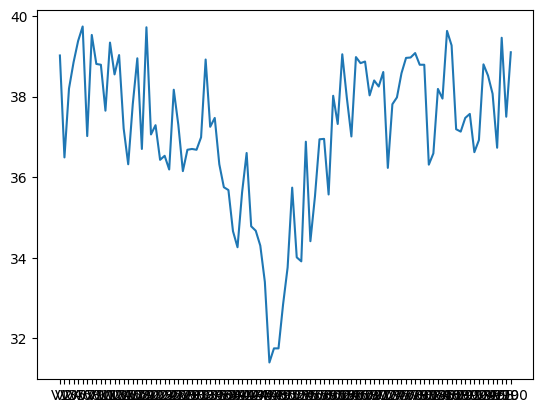

In [19]:
plt.plot(X.iloc[0,:])
plt.show('Valley')

Text(0.5, 1.0, 'Hill')

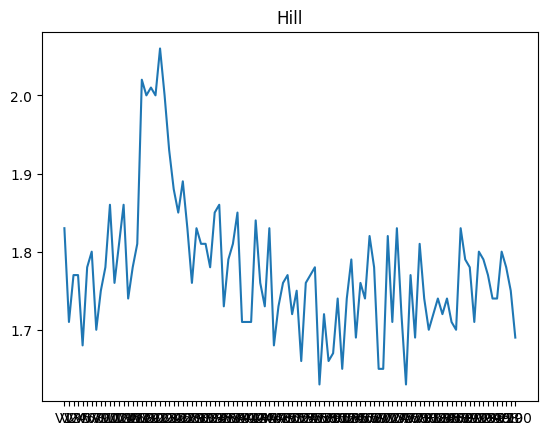

In [20]:
plt.plot(X.iloc[1,:])
plt.title('Hill')

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
ss=StandardScaler()
X=ss.fit_transform(X)

In [23]:
X

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=2529)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((848, 100), (364, 100), (848,), (364,))

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()

In [30]:
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred=lr.predict(X_test)

In [32]:
y_pred.shape

(364,)

In [33]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,

In [36]:
lr.predict_proba(X_test)

array([[0.56336744, 0.43663256],
       [0.50327039, 0.49672961],
       [0.57446514, 0.42553486],
       [0.50737525, 0.49262475],
       [0.50767478, 0.49232522],
       [0.5087066 , 0.4912934 ],
       [0.50793217, 0.49206783],
       [0.60357917, 0.39642083],
       [0.51009655, 0.48990345],
       [0.50964836, 0.49035164],
       [0.50721213, 0.49278787],
       [0.51503419, 0.48496581],
       [0.93595857, 0.06404143],
       [0.50968822, 0.49031178],
       [0.52004959, 0.47995041],
       [0.73731198, 0.26268802],
       [0.47389171, 0.52610829],
       [0.50781847, 0.49218153],
       [0.50862145, 0.49137855],
       [0.5086342 , 0.4913658 ],
       [0.29771935, 0.70228065],
       [0.38273299, 0.61726701],
       [0.50865396, 0.49134604],
       [0.28367974, 0.71632026],
       [0.50873182, 0.49126818],
       [0.50707761, 0.49292239],
       [0.50896136, 0.49103864],
       [0.50811697, 0.49188303],
       [0.50861558, 0.49138442],
       [0.5074842 , 0.4925158 ],
       [0.

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print(confusion_matrix(y_test,y_pred))

[[181   1]
 [106  76]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       182
           1       0.99      0.42      0.59       182

    accuracy                           0.71       364
   macro avg       0.81      0.71      0.68       364
weighted avg       0.81      0.71      0.68       364



In [40]:
X_new=df.sample(1)
X_new

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
536,47.83,43.47,47.16,45.98,43.23,45.91,45.36,44.72,45.84,49.98,...,44.1,42.05,46.42,48.87,48.63,45.26,43.73,41.74,44.19,1


In [42]:
X_new=X_new.drop('Class',axis=1)

In [44]:
X_new=ss.fit_transform(X_new)
y_pred_new=lr.predict(X_new)

In [45]:
y_pred_new

array([1])